[View in Colaboratory](https://colab.research.google.com/github/Masum06/gender_newspaper/blob/master/word2vec_gender_statistics.ipynb)

**Description:**


*   Load 3 trained models, A0, A1, B0
*   Calculate similarity between 2 different Gensim word2vec model using numpy
*   Make statistical calculations with the models, such as Mean, Standar Deviation
*   Calculate number of words outside Standard Deviation
*   Print the words outside norm
*   Plot the histogram of words using Matplotlib
*   Runtime calculation




### 1. Connect to Google drive

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
#@title Default title text
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
ls -l drive/data/models/

total 419182
-rw-r--r-- 1 root root 14873810 Aug 14 11:28 bothReplaced_model_0
-rw-r--r-- 1 root root 14873846 Aug 14 11:34 bothReplaced_model_1
-rw-r--r-- 1 root root 14873864 Aug 14 11:39 bothReplaced_model_2
-rw-r--r-- 1 root root 14873768 Aug 14 11:45 bothReplaced_model_3
-rw-r--r-- 1 root root 14873837 Aug 14 11:50 bothReplaced_model_4
-rw-r--r-- 1 root root 24828279 Aug 14 09:49 femaleReplaced_model_0
-rw-r--r-- 1 root root 24828277 Aug 14 09:55 femaleReplaced_model_1
-rw-r--r-- 1 root root 24828228 Aug 14 10:01 femaleReplaced_model_2
-rw-r--r-- 1 root root 24828216 Aug 14 10:07 femaleReplaced_model_3
-rw-r--r-- 1 root root 24828250 Aug 14 10:13 femaleReplaced_model_4
-rw-r--r-- 1 root root 18186890 Aug 14 09:21 maleReplaced_model_0
-rw-r--r-- 1 root root 18186881 Aug 14 09:26 maleReplaced_model_1
-rw-r--r-- 1 root root 18186853 Aug 14 09:32 maleReplaced_model_2
-rw-r--r-- 1 root root 18186900 Aug 14 09:37 maleReplaced_model_3
-rw-r--r-- 1 root root 18186858 Aug 14 09:43 maleRepl

In [4]:
!cp drive/data/models/* ./

cp: -r not specified; omitting directory 'drive/data/models/old models'


In [5]:
ls -l

total 419232
-rw-r--r-- 1 root root     2544 Aug 16 09:29 adc.json
-rw-r--r-- 1 root root 14873810 Aug 16 09:30 bothReplaced_model_0
-rw-r--r-- 1 root root 14873846 Aug 16 09:30 bothReplaced_model_1
-rw-r--r-- 1 root root 14873864 Aug 16 09:30 bothReplaced_model_2
-rw-r--r-- 1 root root 14873768 Aug 16 09:30 bothReplaced_model_3
-rw-r--r-- 1 root root 14873837 Aug 16 09:30 bothReplaced_model_4
lrwxrwxrwx 1 root root        8 Aug 15 00:55 datalab -> /content/
drwxr-xr-x 2 root root     4096 Aug 16 09:29 drive/
-rw-r--r-- 1 root root 24828279 Aug 16 09:30 femaleReplaced_model_0
-rw-r--r-- 1 root root 24828277 Aug 16 09:30 femaleReplaced_model_1
-rw-r--r-- 1 root root 24828228 Aug 16 09:30 femaleReplaced_model_2
-rw-r--r-- 1 root root 24828216 Aug 16 09:30 femaleReplaced_model_3
-rw-r--r-- 1 root root 24828250 Aug 16 09:30 femaleReplaced_model_4
-rw-r--r-- 1 root root 18186890 Aug 16 09:30 maleReplaced_model_0
-rw-r--r-- 1 root root 18186881 Aug 16 09:30 maleReplaced_model_1
-rw-r--r-- 1 

### Installation and Downloading model

In [0]:
!pip install gensim

###Load 2 models

In [9]:
import gensim
B0 = gensim.models.Word2Vec.load('bothReplaced_model_0')
A0 = gensim.models.Word2Vec.load('nonGender_model_0')
A1 = gensim.models.Word2Vec.load('nonGender_model_1')

FileNotFoundError: ignored

### Similarity Matrix with numpy/Cupy

In [0]:
import numpy as np

In [0]:
mat1 = model1.wv.syn0/np.linalg.norm(model1.wv.syn0, axis=1).reshape(-1, 1) # NORMALIZE
mat2 = model2.wv.syn0/np.linalg.norm(model2.wv.syn0, axis=1).reshape(-1, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [0]:
np.linalg.norm(mat1[59])

1.0

In [0]:
size = len(model1.wv.syn0)
print(size)

94734


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [0]:
mat1.shape

(94734, 100)

In [0]:
ones = np.ones((size, 1))
print(ones.shape)

(94734, 1)


In [0]:
import time

In [0]:
start_time = time.time()
similarity_mat1_multiplier = mat1.T @ ones
similarity_mat1 = mat1@similarity_mat1_multiplier
end_time = time.time()
print("%s seconds" % (end_time - start_time))
print(similarity_mat1.shape)

0.08306717872619629 seconds
(94734, 1)


In [0]:
start_time = time.time()
similarity_mat2_multiplier = mat2.T @ ones
similarity_mat2 = mat2 @ similarity_mat2_multiplier
end_time = time.time()
print("%s seconds" % (end_time - start_time))
print(similarity_mat2.shape)

0.06743669509887695 seconds
(94734, 1)


### Statistics

In [0]:
change_matrix = (similarity_mat1/similarity_mat2).reshape(-1)

In [0]:
print(change_matrix)

[1.01638709 0.93703821 1.00903267 ... 0.5375523  1.07114469 1.01028138]


In [0]:
k = 1
for i in change_matrix:
  print(i, end=", ")
  if k%7 == 0:
    print()
  k+=1

In [0]:
hist, _ = np.histogram(change_matrix, bins=20)
print(hist)

[    4     0     1     1     1     0     2    21 94545   145     6     1
     3     2     0     1     0     0     0     1]


In [0]:
change_matrix[change_matrix<-50]

array([-143.00914442, -398.99322584,  -95.38105705, -108.77047702,
       -742.13236814, -498.41039495, -112.88796326, -120.53128717,
        -79.09526515, -101.06832927, -136.77078869,  -84.17627431,
       -112.1062134 , -773.68652457,  -58.46775408,  -85.67409199,
        -71.0040236 ,  -62.24278807, -142.55329545, -741.71203935,
        -83.20477196,  -75.27196324, -204.92068242,  -82.5325554 ,
       -151.94548137, -213.88938069,  -84.31301918, -131.93146432,
        -54.76417333, -580.3248639 , -125.30828911,  -93.92861052,
       -126.7602052 ,  -95.39447695, -712.71967003])

In [0]:
std = change_matrix.std()

In [0]:
mean = change_matrix.mean()
print(mean)

1.0007349285804605


In [0]:
std_mul = 1
deviated_index = np.append(np.where( change_matrix > mean + std_mul*std ), np.where( change_matrix < mean - std_mul*std ) )
print(len(deviated_index))

367


In [0]:
std_mul = 1
deviated_index = np.append(np.where( change_matrix > 1.1 ), np.where( change_matrix < 0.9 ) )
print(len(deviated_index))

42923


In [0]:
model1.wv["the"]

In [0]:
model2.wv.syn0[model2.wv.vocab['girl'].index]

In [0]:
change_matrix[model2.wv.vocab['girl'].index]

0.9741434699634213

In [0]:
index2word = {}
for word in model2.wv.vocab:
  i = model2.wv.vocab[word].index
  index2word[i] = word

In [0]:
for i in deviated_index:
  print(i, index2word[i])

### Plotting

In [0]:
# PLOTTING HISTOGRAM
import matplotlib.pyplot as plt
#a = np.hstack((change_matrix.normal(size=1000), change_matrix.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(change_matrix)
_ = plt.xlabel('ratio of 2 vector\'s total difference')
_ = plt.ylabel('number of vectors with this ratio')
plt.title("Histogram of change matrix")
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(change_matrix, bins=5, range=[-1, 4], histtype='step',edgecolor='r',linewidth=3)
H, bins = np.histogram(data[:6], bins=5, range=[-1, 4])
H+=np.histogram(data[6:], bins=5,range=[-1, 4])[0]

plt.bar(bins[:-1],H,width=1)

plt.show()

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

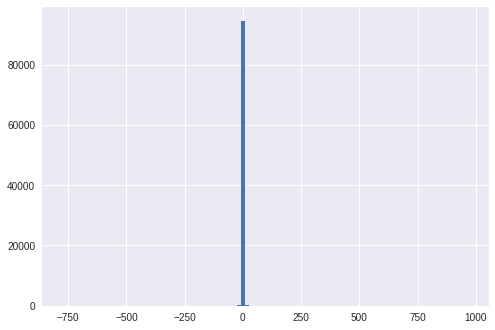

In [0]:
import matplotlib.pyplot as plt
#B = np.random.rand(1000)*100-50
_ = plt.hist(change_matrix, bins=100)
plt.show()

### Difference from "Woman" "Man"

### Time Calculation

In [0]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def diff(t_a, t_b):
    t_diff = relativedelta(t_b, t_a)  # later/end time comes first!
    return '{h}h {m}m {s}s'.format(h=t_diff.hours, m=t_diff.minutes, s=t_diff.seconds)

In [0]:
t_a = datetime.now()

for i in range(100):
  t_b = datetime.now()
  print("index: ",i, "time: ", diff(t_a, t_b))